In [37]:
from itertools import permutations
import random
import math
from numpy.random import randint
from numpy.random import rand
import matplotlib.pyplot as plt
import time

# ALGORITMO GENETICO

### GENERAZIONE POPOLAZIONE INIZIALE

In [38]:
A = [('a1',9), ('a2',6), ('a3',3), ('a4',8), ('a5',5)]

B = [('b1',5), ('b2',7), ('b3',2), ('b4',10)]

jobs = A + B


In [11]:
jobs

[('a1', 9),
 ('a2', 6),
 ('a3', 3),
 ('a4', 8),
 ('a5', 5),
 ('b1', 5),
 ('b2', 7),
 ('b3', 2),
 ('b4', 10)]

In [39]:
def generate_population(jobs, n_pop):
    population = []
    num_jobs = len(jobs)
    
    # Genera n_pop permutazioni casuali
    for _ in range(n_pop):
        # Genera una permutazione casuale dei jobs
        random_permutation = random.sample(jobs, num_jobs)
        population.append(random_permutation)
    
    return population


### FITNESS FUNCTION

In [40]:
# fitness function equivale alla nostra funzione obbiettivo (che deve essere minimizzata)
def fitness_function(soluzione, alfa):
    somma_A = 0
    somma_B = 0
    somma_tot = 0
    for job in soluzione:
        string = str(job[0])
        somma_tot += job[1]
        if string.startswith('a'):
            somma_A += somma_tot
        else:
            somma_B += somma_tot
    
    return (alfa * (somma_A + somma_B)) + ((1-alfa) * abs((somma_A - somma_B)))

### SELEZIONE

In [41]:
# tournament selection
def selection(population, scores, k=3):
    # primo scelto randomicamente (utile estrarlo prima per fare i confronti)
    selection_ix = randint(len(population))
    # scegliamo gli altri k-1 partecipanti randomicamente
    for ix in randint(0, len(population), k-1):
        # controlliamo chi è il migliore tra i k partecipanti
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
            #print("1: ", population[selection_ix])
    return population[selection_ix]

### CROSSOVER

In [42]:
def crossover(p1, p2, r_cross):
    # i figli sono copie dei genitori di default
    c1, c2 = p1.copy(), p2.copy()

    if rand() < r_cross:
        # selezioniamo il punto di taglio per il crossover
        pt = randint(1, len(p1)-1)
        # crossover
        c1 = p1[:pt] + ([elem for elem in p2 if elem not in p1[:pt]])
        c2 = p2[:pt] + ([elem for elem in p1 if elem not in p2[:pt]])
    return [list(c1), list(c2)]

### MUTAZIONE

In [43]:
# mutazione: scambio di posizione di due job
def mutation(c, r_mut):
        if rand() < r_mut:
             # Selezione casuale di due indici di due job in c1
             indexes = random.sample(range(len(c)), 2)
             i, j = indexes[0], indexes[1]
             # Scambia gli elementi di posizione
             elem1 , elem2 = c[i], c[j]
             c[i], c[j] = elem2, elem1




### ALGORITMO

In [8]:
def genetic_algorithm(jobs, n_iter, n_pop, r_cross, r_mut, alfa):
    # popolazione iniziale
    population = generate_population(jobs, n_pop)
    # teniamo traccia della migliore soluzione (all'inizio prendiamo la prima soluzione)
    best, best_eval = 0, fitness_function(population[0],alfa)
    # enumeriamo le iterazioni (il numero di generazioni create)
    for gen in range(n_iter):
        # valutiamo tutti i candidati della popolazione
        scores = [fitness_function(solution,alfa) for solution in population]
        # vediamo qual'è la migliore soluzione della generazione corrente
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = population[i], scores[i]
                print(">%d, new best f(%s) = %.3f" % (gen,  population[i], scores[i]))
        # applichiamo la selezione: selezioniamo i genitori della nuova generazione (tanti genitori quanto la popolazione è grande)
        selected = [selection(population, scores) for _ in range(n_pop)]
        # creiamo la nuova generazione
        children = list()
        # per ogni coppia di genitori
        for i in range(0, n_pop, 2):
            p1, p2 = selected[i], selected[i+1]
            # crossover
            #c è una coppia di figli: 2 figli ogni 2 genitori --> la dimensione della popolazione rimane la stessa
            c = crossover(p1, p2, r_cross)
            # mutazione
            mutation(c[0], r_mut)
            mutation(c[1], r_mut)
            # memorizziamo la nuova generazione
            children.append(c[0])
            children.append(c[1])
        # sostituiamo la nuova generazione
        population = children
    return [best, best_eval]

In [9]:
# numero totale di iterazioni
n_iter = 100
# dimensione popolazione
n_pop = 100
# soglia crossover
r_cross = 0.9
# soglia mutazione
r_mut = 0.6
#coefficiente per la fitness function
alfa = 0.5
# altro parametro da stabilire è k
best,best_eval = genetic_algorithm(jobs, n_iter, n_pop, r_cross, r_mut, alfa)



>0, new best f([('a1', 9), ('a5', 5), ('a2', 6), ('b3', 2), ('b2', 7), ('a3', 3), ('b4', 10), ('b1', 5), ('a4', 8)]) = 140.000
>0, new best f([('b3', 2), ('a4', 8), ('b1', 5), ('a2', 6), ('a1', 9), ('a3', 3), ('a5', 5), ('b4', 10), ('b2', 7)]) = 132.000
>0, new best f([('b1', 5), ('a3', 3), ('a5', 5), ('a2', 6), ('a4', 8), ('b3', 2), ('b2', 7), ('b4', 10), ('a1', 9)]) = 122.000
>1, new best f([('a3', 3), ('b3', 2), ('a2', 6), ('b1', 5), ('a5', 5), ('a1', 9), ('b2', 7), ('b4', 10), ('a4', 8)]) = 120.000
>1, new best f([('a3', 3), ('b3', 2), ('a2', 6), ('b1', 5), ('a5', 5), ('b2', 7), ('a1', 9), ('a4', 8), ('b4', 10)]) = 117.000
>1, new best f([('a3', 3), ('b3', 2), ('a5', 5), ('b1', 5), ('a2', 6), ('a1', 9), ('b2', 7), ('a4', 8), ('b4', 10)]) = 112.000
>5, new best f([('b3', 2), ('a3', 3), ('a5', 5), ('b1', 5), ('a2', 6), ('a4', 8), ('b2', 7), ('a1', 9), ('b4', 10)]) = 110.000


# TEST E ESPERIMENTI ALGORITMO

## a) INPUT FISSATO

### CONVERGENZA  E TEMPO DI ESECUZIONE ALGORITMO

In [23]:
def genetic_algorithm_(jobs, n_iter, n_pop, r_cross, r_mut, alfa):
    # Inizio del cronometro
    start_time = time.time()
    # per il plot
    iterazioni, valori_ottimi = list(), list() 
    # popolazione iniziale
    population = generate_population(jobs, n_pop)
    # teniamo traccia della migliore soluzione (all'inizio prendiamo la prima soluzione)
    best, best_eval = 0, fitness_function(population[0],alfa)
    # enumeriamo le iterazioni (il numero di generazioni create)
    for gen in range(n_iter):
        # valutiamo tutti i candidati della popolazione
        scores = [fitness_function(solution,alfa) for solution in population]
        # vediamo qual'è la migliore soluzione della generazione corrente
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = population[i], scores[i]
                print(">%d, new best f(%s) = %.3f" % (gen,  population[i], scores[i]))
        # applichiamo la selezione: selezioniamo i genitori della nuova generazione (tanti genitori quanto la popolazione è grande)
        selected = [selection(population, scores) for _ in range(n_pop)]
        # creiamo la nuova generazione
        children = list()
        # per ogni coppia di genitori
        for i in range(0, n_pop, 2):
            p1, p2 = selected[i], selected[i+1]
            # crossover
            #c è una coppia di figli: 2 figli ogni 2 genitori --> la dimensione della popolazione rimane la stessa
            c = crossover(p1, p2, r_cross)
            # mutazione
            mutation(c[0], r_mut)
            mutation(c[1], r_mut)
            # memorizziamo la nuova generazione
            children.append(c[0])
            children.append(c[1])
        # sostituiamo la nuova generazione
        population = children
        iterazioni.append(gen)
        valori_ottimi.append(best_eval)
    # Fine del cronometro
    end_time = time.time()
    plt.plot(iterazioni, valori_ottimi)
    plt.xlabel('Iterazione')
    plt.ylabel('Fitness Function')
    plt.title('Convergenza Algoritmo Genetico')
    # Trova l'indice del primo valore di y uguale a 110
    indice = next((i for i, v in enumerate(valori_ottimi) if v == 110), None)

    # Disegna la linea verticale in corrispondenza dell'indice trovato
    if indice is not None:
        plt.axvline(x=iterazioni[indice], color='maroon', label='Valore 110')
        plt.legend()  # Aggiunge la legenda al grafico

    plt.show()
    # Calcolo del tempo trascorso
    elapsed_time = end_time - start_time
    print("Tempo di esecuzione:", elapsed_time, "secondi")
    return [best, best_eval]

>0, new best f([('b1', 5), ('a4', 8), ('a3', 3), ('b4', 10), ('a1', 9), ('a2', 6), ('a5', 5), ('b2', 7), ('b3', 2)]) = 151.000
>0, new best f([('a2', 6), ('b1', 5), ('a3', 3), ('a4', 8), ('a1', 9), ('b3', 2), ('b2', 7), ('a5', 5), ('b4', 10)]) = 139.000
>0, new best f([('a4', 8), ('a5', 5), ('b2', 7), ('a2', 6), ('b3', 2), ('b1', 5), ('a3', 3), ('a1', 9), ('b4', 10)]) = 136.000
>0, new best f([('a3', 3), ('b1', 5), ('b3', 2), ('a4', 8), ('a2', 6), ('a5', 5), ('a1', 9), ('b2', 7), ('b4', 10)]) = 118.000
>0, new best f([('b3', 2), ('a5', 5), ('b1', 5), ('a2', 6), ('a3', 3), ('a4', 8), ('a1', 9), ('b4', 10), ('b2', 7)]) = 117.000
>1, new best f([('b3', 2), ('a5', 5), ('b1', 5), ('a2', 6), ('a3', 3), ('a4', 8), ('a1', 9), ('b2', 7), ('b4', 10)]) = 114.000
>2, new best f([('b3', 2), ('b1', 5), ('a3', 3), ('a5', 5), ('a2', 6), ('a4', 8), ('a1', 9), ('b2', 7), ('b4', 10)]) = 113.000
>5, new best f([('a5', 5), ('b3', 2), ('a3', 3), ('a2', 6), ('b1', 5), ('b2', 7), ('a4', 8), ('a1', 9), ('b4', 

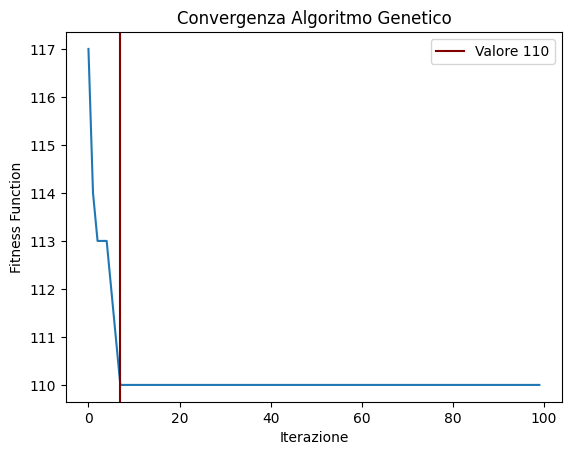

Tempo di esecuzione: 0.19784188270568848 secondi


In [24]:
# numero totale di iterazioni
n_iter = 100
# dimensione popolazione
n_pop = 100
# soglia crossover
r_cross = 0.9
# soglia mutazione
r_mut = 0.6
#coefficiente per la fitness function
alfa = 0.5
# altro parametro da stabilire è k
best,best_eval = genetic_algorithm_(jobs, n_iter, n_pop, r_cross, r_mut, alfa)

### ANDAMENTO SOLUZIONE AL VARIARE DI ALFA

In [36]:
def genetic_algorithm_alfa(jobs, n_iter, n_pop, r_cross, r_mut, alfa):
    # popolazione iniziale
    population = generate_population(jobs, n_pop)
    # teniamo traccia della migliore soluzione (all'inizio prendiamo la prima soluzione)
    best, best_eval = 0, fitness_function(population[0],alfa)
    # enumeriamo le iterazioni (il numero di generazioni create)
    for gen in range(n_iter):
        # valutiamo tutti i candidati della popolazione
        scores = [fitness_function(solution,alfa) for solution in population]
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = population[i], scores[i]
        
        # applichiamo la selezione: selezioniamo i genitori della nuova generazione (tanti genitori quanto la popolazione è grande)
        selected = [selection(population, scores) for _ in range(n_pop)]
        # creiamo la nuova generazione
        children = list()
        # per ogni coppia di genitori
        for i in range(0, n_pop, 2):
            p1, p2 = selected[i], selected[i+1]
            # crossover
            #c è una coppia di figli: 2 figli ogni 2 genitori --> la dimensione della popolazione rimane la stessa
            c = crossover(p1, p2, r_cross)
            # mutazione
            mutation(c[0], r_mut)
            mutation(c[1], r_mut)
            # memorizziamo la nuova generazione
            children.append(c[0])
            children.append(c[1])
        # sostituiamo la nuova generazione
        population = children

    return [best, best_eval]

0.0
22.200000000000003
44.400000000000006
66.4
88.2
110.0
131.6
153.2
174.8
196.4
217.0


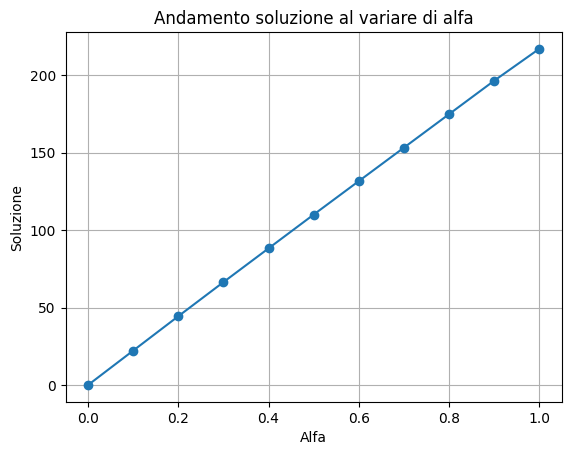

In [27]:

# Lista per memorizzare i valori di alfa
alfas = []
# Lista per memorizzare i valori di y
soluzioni = []
n_iter = 1000

# Chiamata del metodo con alfa che varia da 0 a 1 con incremento di 0.1
for alfa in [i / 10.0 for i in range(11)]:
    alfas.append(alfa)
    best, best_eval = genetic_algorithm_alfa(jobs, n_iter, n_pop, r_cross, r_mut, alfa)
    print(best_eval)
    soluzioni.append(best_eval)

# Plot dei risultati
plt.plot(alfas, soluzioni, marker='o')
plt.xlabel('Alfa')
plt.ylabel('Soluzione')
plt.title('Andamento soluzione al variare di alfa')
plt.grid(True)
plt.show()


## b) INPUT DINAMICO

### TEMPO DI ESECUZIONE MEDIO E SOLUZIONE RITORNATA MEDIA: 10 esecuzioni con 10 job totali con 1000 iterazioni

In [11]:
def genetic_algorithm_time(jobs, n_iter, n_pop, r_cross, r_mut, alfa):
    # Inizio del cronometro
    start_time = time.time()
    # popolazione iniziale
    population = generate_population(jobs, n_pop)
    # teniamo traccia della migliore soluzione (all'inizio prendiamo la prima soluzione)
    best, best_eval = 0, fitness_function(population[0],alfa)
    # enumeriamo le iterazioni (il numero di generazioni create)
    for gen in range(n_iter):
        # valutiamo tutti i candidati della popolazione
        scores = [fitness_function(solution,alfa) for solution in population]
        # vediamo qual'è la migliore soluzione della generazione corrente
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = population[i], scores[i]
        # applichiamo la selezione: selezioniamo i genitori della nuova generazione (tanti genitori quanto la popolazione è grande)
        selected = [selection(population, scores) for _ in range(n_pop)]
        # creiamo la nuova generazione
        children = list()
        # per ogni coppia di genitori
        for i in range(0, n_pop, 2):
            p1, p2 = selected[i], selected[i+1]
            # crossover
            #c è una coppia di figli: 2 figli ogni 2 genitori --> la dimensione della popolazione rimane la stessa
            c = crossover(p1, p2, r_cross)
            # mutazione
            mutation(c[0], r_mut)
            mutation(c[1], r_mut)
            # memorizziamo la nuova generazione
            children.append(c[0])
            children.append(c[1])
        # sostituiamo la nuova generazione
        population = children
    # Fine del cronometro
    end_time = time.time()
    # Calcolo del tempo trascorso
    elapsed_time = end_time - start_time
    return [elapsed_time, best_eval]

In [20]:
# Lista per le tuple di A
A = [('a{}'.format(i+1), random.randint(10, 50)) for i in range(5)]

# Lista per le tuple di B
B = [('b{}'.format(i+1), random.randint(10, 50)) for i in range(5)]

jobs = A+B

print(jobs)
print(len(jobs))

[('a1', 14), ('a2', 18), ('a3', 23), ('a4', 26), ('a5', 28), ('b1', 23), ('b2', 15), ('b3', 16), ('b4', 37), ('b5', 19)]
10


In [21]:
# numero totale di iterazioni
n_iter = 1000
# dimensione popolazione
n_pop = 100
# soglia crossover
r_cross = 0.9
# soglia mutazione
r_mut = 0.6
#coefficiente per la fitness function
alfa = 0.5

soluzioni = list()
tempi_esecuzione = list()

In [22]:
for _ in range(10):
    tempo,best_eval = genetic_algorithm_time(jobs, n_iter, n_pop, r_cross, r_mut, alfa)
    tempi_esecuzione.append(tempo)
    soluzioni.append(best_eval)
print("Tempi: ", tempi_esecuzione)
print("Soluzioni: ", soluzioni)

Tempi:  [1.9424481391906738, 1.8294579982757568, 1.8507859706878662, 1.9460818767547607, 1.853194236755371, 1.8876228332519531, 1.8722920417785645, 1.8620588779449463, 1.9285321235656738, 1.867286205291748]
Soluzioni:  [514.0, 514.0, 514.0, 514.0, 514.0, 514.0, 514.0, 514.0, 514.0, 514.0]


In [24]:
media_tempo_10job = sum(tempi_esecuzione)/len(tempi_esecuzione)
media_soluzione_10job = sum(soluzioni)/len(soluzioni)
print("Tempo medio di esecuzione: ", media_tempo_10job)
print("Soluzione media trovata: ", media_soluzione_10job)

Tempo medio di esecuzione:  1.8839760303497315
Soluzione media trovata:  514.0


### TEMPO DI ESECUZIONE MEDIO E SOLUZIONE RITORNATA MEDIA: 10 esecuzioni con 100 job totali con 1000 iterazioni

In [19]:
#A = [('a{}'.format(i+1), random.randint(10, 50)) for i in range(50)]

#B = [('b{}'.format(i+1), random.randint(10, 50)) for i in range(50)]

#jobs = A+B
jobs = [('a1', 22), ('a2', 49), ('a3', 19), ('a4', 13), ('a5', 35), ('a6', 26), ('a7', 14), ('a8', 41), ('a9', 28), ('a10', 38), ('a11', 18), ('a12', 21), ('a13', 35), ('a14', 18), ('a15', 15), ('a16', 30), ('a17', 33), ('a18', 12), ('a19', 34), ('a20', 25), ('a21', 26), ('a22', 27), ('a23', 24), ('a24', 10), ('a25', 41), ('a26', 46), ('a27', 21), ('a28', 46), ('a29', 45), ('a30', 16), ('a31', 45), ('a32', 28), ('a33', 32), ('a34', 20), ('a35', 49), ('a36', 11), ('a37', 18), ('a38', 49), ('a39', 28), ('a40', 37), ('a41', 40), ('a42', 37), ('a43', 30), ('a44', 42), ('a45', 22), ('a46', 27), ('a47', 46), ('a48', 19), ('a49', 43), ('a50', 50), ('b1', 29), ('b2', 21), ('b3', 16), ('b4', 17), ('b5', 35), ('b6', 13), ('b7', 32), ('b8', 39), ('b9', 14), ('b10', 18), ('b11', 16), ('b12', 37), ('b13', 49), ('b14', 50), ('b15', 44), ('b16', 30), ('b17', 44), ('b18', 48), ('b19', 30), ('b20', 19), ('b21', 38), ('b22', 19), ('b23', 27), ('b24', 10), ('b25', 30), ('b26', 46), ('b27', 15), ('b28', 24), ('b29', 33), ('b30', 48), ('b31', 17), ('b32', 28), ('b33', 46), ('b34', 26), ('b35', 33), ('b36', 26), ('b37', 29), ('b38', 27), ('b39', 23), ('b40', 35), ('b41', 30), ('b42', 25), ('b43', 31), ('b44', 19), ('b45', 23), ('b46', 44), ('b47', 42), ('b48', 46), ('b49', 15), ('b50', 50)]

print(jobs)
print(len(jobs))

[('a1', 22), ('a2', 49), ('a3', 19), ('a4', 13), ('a5', 35), ('a6', 26), ('a7', 14), ('a8', 41), ('a9', 28), ('a10', 38), ('a11', 18), ('a12', 21), ('a13', 35), ('a14', 18), ('a15', 15), ('a16', 30), ('a17', 33), ('a18', 12), ('a19', 34), ('a20', 25), ('a21', 26), ('a22', 27), ('a23', 24), ('a24', 10), ('a25', 41), ('a26', 46), ('a27', 21), ('a28', 46), ('a29', 45), ('a30', 16), ('a31', 45), ('a32', 28), ('a33', 32), ('a34', 20), ('a35', 49), ('a36', 11), ('a37', 18), ('a38', 49), ('a39', 28), ('a40', 37), ('a41', 40), ('a42', 37), ('a43', 30), ('a44', 42), ('a45', 22), ('a46', 27), ('a47', 46), ('a48', 19), ('a49', 43), ('a50', 50), ('b1', 29), ('b2', 21), ('b3', 16), ('b4', 17), ('b5', 35), ('b6', 13), ('b7', 32), ('b8', 39), ('b9', 14), ('b10', 18), ('b11', 16), ('b12', 37), ('b13', 49), ('b14', 50), ('b15', 44), ('b16', 30), ('b17', 44), ('b18', 48), ('b19', 30), ('b20', 19), ('b21', 38), ('b22', 19), ('b23', 27), ('b24', 10), ('b25', 30), ('b26', 46), ('b27', 15), ('b28', 24), ('b

In [20]:
# numero totale di iterazioni
n_iter = 1000
# dimensione popolazione
n_pop = 100
# soglia crossover
r_cross = 0.9
# soglia mutazione
r_mut = 0.6
#coefficiente per la fitness function
alfa = 0.5

soluzioni = list()
tempi_esecuzione = list()
for _ in range(10):
    tempo,best_eval = genetic_algorithm_time(jobs, n_iter, n_pop, r_cross, r_mut, alfa)
    tempi_esecuzione.append(tempo)
    soluzioni.append(best_eval)
print("Tempi: ", tempi_esecuzione)
print("Soluzioni: ", soluzioni)

Tempi:  [18.31162714958191, 16.745898008346558, 17.673278093338013, 18.735841035842896, 17.357618808746338, 17.724435091018677, 17.136677026748657, 17.129488229751587, 17.15275478363037, 20.217183113098145]
Soluzioni:  [59502.0, 59574.0, 59542.0, 59522.0, 59530.0, 59547.0, 59525.0, 59516.0, 59538.0, 59551.0]


In [21]:
media_tempo_100job = sum(tempi_esecuzione)/len(tempi_esecuzione)
media_soluzione_100job = sum(soluzioni)/len(soluzioni)
print("Tempo medio di esecuzione: ", media_tempo_100job)
print("Soluzione media trovata: ", media_soluzione_100job)
print("Min: ", min(soluzioni))

Tempo medio di esecuzione:  17.818480134010315
Soluzione media trovata:  59534.7
Min:  59502.0


### TEMPO DI ESECUZIONE MEDIO E SOLUZIONE RITORNATA MEDIA: 10 esecuzioni con 1000 job totali con 1000 iterazioni

In [29]:
A = [('a{}'.format(i+1), random.randint(10, 50)) for i in range(500)]

B = [('b{}'.format(i+1), random.randint(10, 50)) for i in range(500)]

jobs = A+B

print(jobs)
print(len(jobs))

[('a1', 23), ('a2', 11), ('a3', 36), ('a4', 46), ('a5', 50), ('a6', 20), ('a7', 13), ('a8', 41), ('a9', 22), ('a10', 49), ('a11', 29), ('a12', 44), ('a13', 19), ('a14', 40), ('a15', 41), ('a16', 42), ('a17', 35), ('a18', 10), ('a19', 47), ('a20', 24), ('a21', 25), ('a22', 50), ('a23', 14), ('a24', 29), ('a25', 38), ('a26', 30), ('a27', 15), ('a28', 38), ('a29', 15), ('a30', 17), ('a31', 49), ('a32', 36), ('a33', 21), ('a34', 46), ('a35', 23), ('a36', 34), ('a37', 21), ('a38', 28), ('a39', 45), ('a40', 27), ('a41', 42), ('a42', 38), ('a43', 43), ('a44', 13), ('a45', 27), ('a46', 21), ('a47', 48), ('a48', 17), ('a49', 36), ('a50', 21), ('a51', 44), ('a52', 37), ('a53', 50), ('a54', 16), ('a55', 19), ('a56', 21), ('a57', 46), ('a58', 24), ('a59', 10), ('a60', 41), ('a61', 15), ('a62', 41), ('a63', 38), ('a64', 39), ('a65', 32), ('a66', 25), ('a67', 40), ('a68', 35), ('a69', 45), ('a70', 47), ('a71', 10), ('a72', 42), ('a73', 48), ('a74', 11), ('a75', 45), ('a76', 28), ('a77', 50), ('a78',

In [30]:
# numero totale di iterazioni
n_iter = 1000
# dimensione popolazione
n_pop = 100
# soglia crossover
r_cross = 0.9
# soglia mutazione
r_mut = 0.6
#coefficiente per la fitness function
alfa = 0.5

soluzioni = list()
tempi_esecuzione = list()
for _ in range(10):
    tempo,best_eval = genetic_algorithm_time(jobs, n_iter, n_pop, r_cross, r_mut, alfa)
    tempi_esecuzione.append(tempo)
    soluzioni.append(best_eval)
print("Tempi: ", tempi_esecuzione)
print("Soluzioni: ", soluzioni)

Tempi:  [1301.3248150348663, 1226.7162780761719, 1078.391457080841, 1087.0031490325928, 1081.686558008194, 1085.7227938175201, 1077.0230631828308, 1084.3765470981598, 1084.048124074936, 1087.056790113449]
Soluzioni:  [6088706.0, 6057319.0, 6073809.0, 6070460.0, 6066066.0, 6070985.0, 6072774.0, 6058553.0, 6066266.0, 6075984.0]


In [31]:
media_tempo_1000job = sum(tempi_esecuzione)/len(tempi_esecuzione)
media_soluzione_1000job = sum(soluzioni)/len(soluzioni)
print("Tempo medio di esecuzione: ", media_tempo_1000job)
print("Soluzione media trovata: ", media_soluzione_1000job)
print("Min: ", min(soluzioni))

Tempo medio di esecuzione:  1119.3349575519562
Soluzione media trovata:  6070092.2
Min:  6057319.0


### TEMPO DI ESECUZIONE MEDIO E SOLUZIONE RITORNATA MEDIA: 10 esecuzioni con 500 job totali con 1000 iterazioni

In [32]:
A = [('a{}'.format(i+1), random.randint(10, 50)) for i in range(250)]

B = [('b{}'.format(i+1), random.randint(10, 50)) for i in range(250)]

jobs = A+B

print(jobs)
print(len(jobs))

[('a1', 50), ('a2', 22), ('a3', 30), ('a4', 28), ('a5', 21), ('a6', 12), ('a7', 16), ('a8', 11), ('a9', 21), ('a10', 17), ('a11', 16), ('a12', 50), ('a13', 28), ('a14', 11), ('a15', 28), ('a16', 26), ('a17', 30), ('a18', 44), ('a19', 20), ('a20', 45), ('a21', 14), ('a22', 50), ('a23', 40), ('a24', 30), ('a25', 18), ('a26', 26), ('a27', 48), ('a28', 22), ('a29', 44), ('a30', 41), ('a31', 26), ('a32', 46), ('a33', 23), ('a34', 42), ('a35', 14), ('a36', 27), ('a37', 21), ('a38', 36), ('a39', 33), ('a40', 26), ('a41', 21), ('a42', 39), ('a43', 16), ('a44', 18), ('a45', 15), ('a46', 49), ('a47', 20), ('a48', 22), ('a49', 11), ('a50', 26), ('a51', 14), ('a52', 12), ('a53', 40), ('a54', 35), ('a55', 50), ('a56', 49), ('a57', 36), ('a58', 32), ('a59', 47), ('a60', 23), ('a61', 12), ('a62', 25), ('a63', 44), ('a64', 17), ('a65', 34), ('a66', 18), ('a67', 10), ('a68', 42), ('a69', 41), ('a70', 38), ('a71', 40), ('a72', 47), ('a73', 41), ('a74', 37), ('a75', 21), ('a76', 21), ('a77', 30), ('a78',

In [33]:
# numero totale di iterazioni
n_iter = 1000
# dimensione popolazione
n_pop = 100
# soglia crossover
r_cross = 0.9
# soglia mutazione
r_mut = 0.6
#coefficiente per la fitness function
alfa = 0.5

soluzioni = list()
tempi_esecuzione = list()
for _ in range(10):
    tempo,best_eval = genetic_algorithm_time(jobs, n_iter, n_pop, r_cross, r_mut, alfa)
    tempi_esecuzione.append(tempo)
    soluzioni.append(best_eval)
print("Tempi: ", tempi_esecuzione)
print("Soluzioni: ", soluzioni)

Tempi:  [273.18091893196106, 272.4303250312805, 272.51550793647766, 272.4492678642273, 272.96747279167175, 272.21592593193054, 273.98576402664185, 277.15477895736694, 274.75726103782654, 273.27770709991455]
Soluzioni:  [1459849.0, 1458598.0, 1461352.0, 1457751.0, 1459721.0, 1460585.0, 1457887.0, 1462006.0, 1459725.0, 1456386.0]


In [34]:
media_tempo_500job = sum(tempi_esecuzione)/len(tempi_esecuzione)
media_soluzione_500job = sum(soluzioni)/len(soluzioni)
print("Tempo medio di esecuzione: ", media_tempo_500job)
print("Soluzione media trovata: ", media_soluzione_500job)
print("Min: ", min(soluzioni))

Tempo medio di esecuzione:  273.49349296092987
Soluzione media trovata:  1459386.0
Min:  1456386.0


## c) INPUT: NUMERO DI JOB UGUALE e di durata tra [10 e 50] tra A e B ^^^ fatti sopra questi esperimenti ^^^ (da vedere per gli esperimenti sopra le due funzioni obiettivo che valori ritornano)

## d) INPUT: NUMERO DI JOB UGUALE MA DURATE DEI JOB DI B > A

In [35]:
A = [('a{}'.format(i+1), random.randint(1, 10)) for i in range(50)]

B = [('b{}'.format(i+1), random.randint(10, 50)) for i in range(50)]

jobs = A+B

print(jobs)
print(len(jobs))

[('a1', 9), ('a2', 5), ('a3', 4), ('a4', 7), ('a5', 8), ('a6', 8), ('a7', 5), ('a8', 9), ('a9', 8), ('a10', 6), ('a11', 2), ('a12', 10), ('a13', 8), ('a14', 5), ('a15', 5), ('a16', 7), ('a17', 5), ('a18', 6), ('a19', 7), ('a20', 9), ('a21', 8), ('a22', 3), ('a23', 6), ('a24', 4), ('a25', 6), ('a26', 1), ('a27', 1), ('a28', 7), ('a29', 5), ('a30', 3), ('a31', 2), ('a32', 2), ('a33', 3), ('a34', 2), ('a35', 10), ('a36', 3), ('a37', 4), ('a38', 10), ('a39', 6), ('a40', 6), ('a41', 8), ('a42', 4), ('a43', 5), ('a44', 1), ('a45', 9), ('a46', 3), ('a47', 6), ('a48', 2), ('a49', 9), ('a50', 7), ('b1', 36), ('b2', 44), ('b3', 47), ('b4', 23), ('b5', 41), ('b6', 15), ('b7', 19), ('b8', 23), ('b9', 17), ('b10', 23), ('b11', 39), ('b12', 26), ('b13', 33), ('b14', 15), ('b15', 21), ('b16', 17), ('b17', 14), ('b18', 12), ('b19', 35), ('b20', 42), ('b21', 14), ('b22', 13), ('b23', 22), ('b24', 40), ('b25', 42), ('b26', 33), ('b27', 36), ('b28', 34), ('b29', 30), ('b30', 12), ('b31', 19), ('b32', 23)

In [36]:
# numero totale di iterazioni
n_iter = 1000
# dimensione popolazione
n_pop = 100
# soglia crossover
r_cross = 0.9
# soglia mutazione
r_mut = 0.6
#coefficiente per la fitness function
alfa = 0.5

soluzioni = list()
tempi_esecuzione = list()
for _ in range(10):
    tempo,best_eval = genetic_algorithm_time(jobs, n_iter, n_pop, r_cross, r_mut, alfa)
    tempi_esecuzione.append(tempo)
    soluzioni.append(best_eval)
print("Tempi: ", tempi_esecuzione)
print("Soluzioni: ", soluzioni)

Tempi:  [16.31147599220276, 15.322732925415039, 15.420289039611816, 15.354767084121704, 15.502780199050903, 15.398769855499268, 15.268924236297607, 15.7002272605896, 18.7014000415802, 17.935034036636353]
Soluzioni:  [32362.0, 32367.0, 32362.0, 32360.0, 32358.0, 32401.0, 32349.0, 32370.0, 32386.0, 32399.0]


In [37]:
media_tempo_100job2 = sum(tempi_esecuzione)/len(tempi_esecuzione)
media_soluzione_100job2 = sum(soluzioni)/len(soluzioni)
print("Tempo medio di esecuzione: ", media_tempo_100job2)
print("Soluzione media trovata: ", media_soluzione_100job2)
print("Min: ", min(soluzioni))

Tempo medio di esecuzione:  16.091640067100524
Soluzione media trovata:  32371.4
Min:  32349.0


# PLOT DEI TEMPI DI DETECTION E DELLA SOLUZIONE MEDIA

In [28]:
# tempi medi:
#Tempo medio di esecuzione 10 job:  1.8839760303497315
#Tempo medio di esecuzione 100 job:  17.818480134010315
#Tempo medio di esecuzione 500 job:  273.49349296092987
#Tempo medio di esecuzione 1000 job:  1119.3349575519562


tempi = [1.88, 17.82, 273.49, 1119.33]


In [32]:
# soluzioni medie:
#Soluzione media trovata 10 job:  514.0
#Soluzione media trovata 100 job:  59534.7
#Soluzione media trovata 500 job:  1459386.0
#Soluzione media trovata 1000 job:  6070092.2

soluzioni = [514.0, 59534.7, 1459386.0, 6070092.2]



In [33]:
numero_job = [10, 100, 500, 1000]

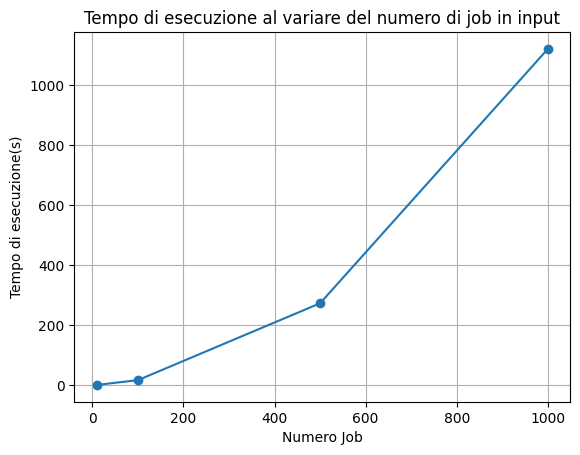

In [31]:
# Plot dei risultati
plt.plot(numero_job, tempi, marker='o')
plt.xlabel('Numero Job')
plt.ylabel('Tempo di esecuzione(s)')
plt.title('Tempo di esecuzione al variare del numero di job in input')
plt.grid(True)
plt.show()

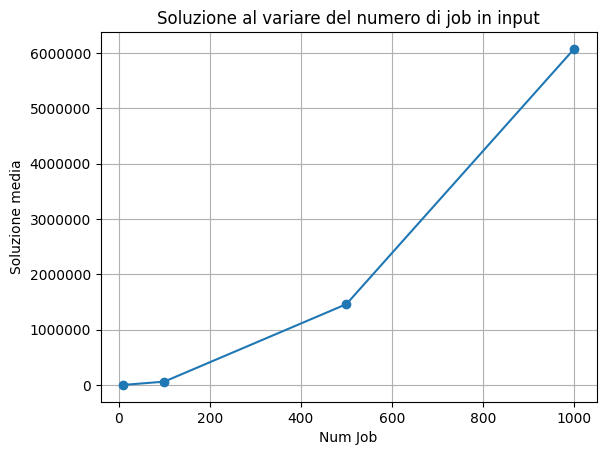

In [35]:
# Plot dei risultati
plt.plot(numero_job, soluzioni, marker='o')
plt.xlabel('Num Job')
plt.ylabel('Soluzione media')
plt.title('Soluzione al variare del numero di job in input')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# ESPERIMENTI SULLE DUE FUNZIONI OBIETTIVO

### PLOTTIAMO I DUE VALORI DELLE FUNZIONI OBIETTIVO AL VARIARE DELLA LUNGHEZZA DEI JOB DI B (CON A FISSATO)

In [44]:
def objective_functions(soluzione):
    somma_A = 0
    somma_B = 0
    somma_tot = 0
    for job in soluzione:
        string = str(job[0])
        somma_tot += job[1]
        if string.startswith('a'):
            somma_A += somma_tot
        else:
            somma_B += somma_tot
    
    return [somma_A + somma_B , abs(somma_A - somma_B)]

## 10 esecuzioni con 100 job: ogni esecuzione la lunghezza dei job di B è incrementata

In [48]:
# numero totale di iterazioni
n_iter = 1000
# dimensione popolazione
n_pop = 100
# soglia crossover
r_cross = 0.9
# soglia mutazione
r_mut = 0.6
#coefficiente per la fitness function
alfa = 0.5

A = [('a{}'.format(i+1), random.randint(1, 10)) for i in range(50)]
lista_function1,lista_function2 = list(), list()
for j in range(1,11):
    if(j ==1):
        B = [('b{}'.format(i+1), random.randint(1, 10*j)) for i in range(50)]
    else:
        B = [('b{}'.format(i+1), random.randint(10, 10*j)) for i in range(50)]
    jobs = A+B
    best,best_eval = genetic_algorithm_alfa(jobs, n_iter, n_pop, r_cross, r_mut, alfa)
    function1,function2 = objective_functions(best)
    print(function1)
    print(function2)
    print("")
    lista_function1.append(function1)
    lista_function2.append(function2)


18640
0

44222
2

53013
1

65930
10

72409
5

69130
10

98669
15

72831
17

106830
4

130188
0



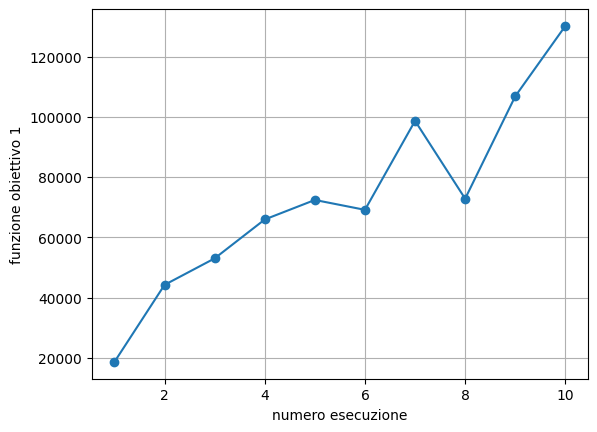

In [50]:
lista_iterazioni = list()
for i in range(1,11):
    lista_iterazioni.append(i)
# Plot function1
plt.plot(lista_iterazioni, lista_function1, marker='o')
plt.xlabel('numero esecuzione')
plt.ylabel('funzione obiettivo 1')
plt.title('')
plt.grid(True)
plt.show()

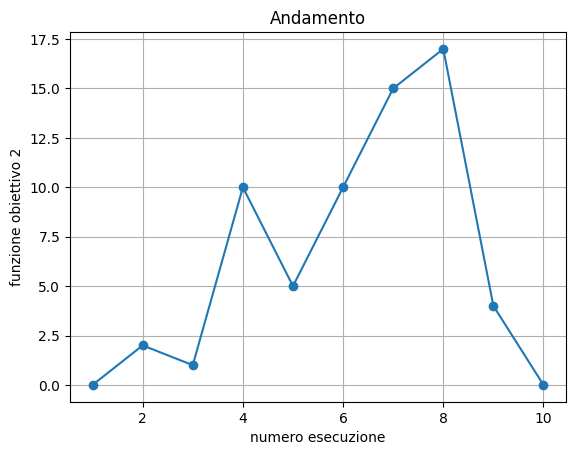

In [51]:
lista_iterazioni = list()
for i in range(1,11):
    lista_iterazioni.append(i)
# Plot function2
plt.plot(lista_iterazioni, lista_function2, marker='o')
plt.xlabel('numero esecuzione')
plt.ylabel('funzione obiettivo 2')
plt.title('Andamento')
plt.grid(True)
plt.show()

## ESPERIMENTO PER VEDERE CONVERGENZA

In [16]:
jobs = [('a1', 22), ('a2', 49), ('a3', 19), ('a4', 13), ('a5', 35), ('a6', 26), ('a7', 14), ('a8', 41), ('a9', 28), ('a10', 38), ('a11', 18), ('a12', 21), ('a13', 35), ('a14', 18), ('a15', 15), ('a16', 30), ('a17', 33), ('a18', 12), ('a19', 34), ('a20', 25), ('a21', 26), ('a22', 27), ('a23', 24), ('a24', 10), ('a25', 41), ('a26', 46), ('a27', 21), ('a28', 46), ('a29', 45), ('a30', 16), ('a31', 45), ('a32', 28), ('a33', 32), ('a34', 20), ('a35', 49), ('a36', 11), ('a37', 18), ('a38', 49), ('a39', 28), ('a40', 37), ('a41', 40), ('a42', 37), ('a43', 30), ('a44', 42), ('a45', 22), ('a46', 27), ('a47', 46), ('a48', 19), ('a49', 43), ('a50', 50), ('b1', 29), ('b2', 21), ('b3', 16), ('b4', 17), ('b5', 35), ('b6', 13), ('b7', 32), ('b8', 39), ('b9', 14), ('b10', 18), ('b11', 16), ('b12', 37), ('b13', 49), ('b14', 50), ('b15', 44), ('b16', 30), ('b17', 44), ('b18', 48), ('b19', 30), ('b20', 19), ('b21', 38), ('b22', 19), ('b23', 27), ('b24', 10), ('b25', 30), ('b26', 46), ('b27', 15), ('b28', 24), ('b29', 33), ('b30', 48), ('b31', 17), ('b32', 28), ('b33', 46), ('b34', 26), ('b35', 33), ('b36', 26), ('b37', 29), ('b38', 27), ('b39', 23), ('b40', 35), ('b41', 30), ('b42', 25), ('b43', 31), ('b44', 19), ('b45', 23), ('b46', 44), ('b47', 42), ('b48', 46), ('b49', 15), ('b50', 50)]

In [18]:
# numero totale di iterazioni
n_iter = 10000
# dimensione popolazione
n_pop = 100
# soglia crossover
r_cross = 0.9
# soglia mutazione
r_mut = 0.6
#coefficiente per la fitness function
alfa = 0.5

best,best_eval = genetic_algorithm(jobs, n_iter, n_pop, r_cross, r_mut, alfa)
print(best_eval)
   

>0, new best f([('b6', 13), ('b2', 21), ('b47', 42), ('b11', 16), ('b48', 46), ('a32', 28), ('a38', 49), ('b32', 28), ('a25', 41), ('a27', 21), ('b1', 29), ('a7', 14), ('b21', 38), ('b38', 27), ('b27', 15), ('b45', 23), ('a10', 38), ('b23', 27), ('b10', 18), ('a20', 25), ('a16', 30), ('a3', 19), ('a11', 18), ('a2', 49), ('b31', 17), ('a46', 27), ('b24', 10), ('b33', 46), ('b5', 35), ('b8', 39), ('a1', 22), ('b34', 26), ('b35', 33), ('a45', 22), ('a24', 10), ('a31', 45), ('a15', 15), ('a29', 45), ('a5', 35), ('a35', 49), ('a49', 43), ('a14', 18), ('b49', 15), ('b42', 25), ('b46', 44), ('a47', 46), ('b3', 16), ('a42', 37), ('b15', 44), ('a41', 40), ('b22', 19), ('b28', 24), ('a23', 24), ('b9', 14), ('a39', 28), ('b41', 30), ('a43', 30), ('a34', 20), ('a40', 37), ('a30', 16), ('a13', 35), ('a44', 42), ('a36', 11), ('b50', 50), ('b12', 37), ('b16', 30), ('a17', 33), ('a12', 21), ('a28', 46), ('b25', 30), ('a4', 13), ('a48', 19), ('b26', 46), ('b39', 23), ('a19', 34), ('a6', 26), ('a22', 27

# TEST DELLE FUNZIONI

In [ ]:
A = [('a1',9), ('a2',6), ('a3',3), ('a4',8), ('a5',5)]

B = [('b1',5), ('b2',7), ('b3',2), ('b4',10)]

jobs = A + B

jobs



[('a1', 9),
 ('a2', 6),
 ('a3', 3),
 ('a4', 8),
 ('a5', 5),
 ('b1', 5),
 ('b2', 7),
 ('b3', 2),
 ('b4', 10)]

### TEST GENERAZIONE POPOLAZIONE

In [ ]:
soluzioni = generate_population(jobs, n_pop)
soluzioni

[[('a1', 9),
  ('a5', 5),
  ('a3', 3),
  ('a2', 6),
  ('b2', 7),
  ('b3', 2),
  ('a4', 8),
  ('b1', 5),
  ('b4', 10)],
 [('b1', 5),
  ('b2', 7),
  ('a3', 3),
  ('b4', 10),
  ('a2', 6),
  ('a1', 9),
  ('a5', 5),
  ('b3', 2),
  ('a4', 8)],
 [('a2', 6),
  ('a4', 8),
  ('b1', 5),
  ('a1', 9),
  ('a5', 5),
  ('b2', 7),
  ('b3', 2),
  ('b4', 10),
  ('a3', 3)],
 [('a4', 8),
  ('b2', 7),
  ('a1', 9),
  ('b1', 5),
  ('b4', 10),
  ('b3', 2),
  ('a5', 5),
  ('a3', 3),
  ('a2', 6)],
 [('b4', 10),
  ('b1', 5),
  ('b2', 7),
  ('a5', 5),
  ('a2', 6),
  ('a3', 3),
  ('a4', 8),
  ('b3', 2),
  ('a1', 9)],
 [('b4', 10),
  ('b1', 5),
  ('a5', 5),
  ('a1', 9),
  ('a4', 8),
  ('b2', 7),
  ('b3', 2),
  ('a2', 6),
  ('a3', 3)],
 [('b3', 2),
  ('b1', 5),
  ('a2', 6),
  ('a5', 5),
  ('a3', 3),
  ('a4', 8),
  ('b2', 7),
  ('b4', 10),
  ('a1', 9)],
 [('a3', 3),
  ('b4', 10),
  ('b2', 7),
  ('a5', 5),
  ('a4', 8),
  ('b1', 5),
  ('b3', 2),
  ('a2', 6),
  ('a1', 9)],
 [('b1', 5),
  ('a5', 5),
  ('b3', 2),
  ('b2', 

In [ ]:
len(soluzioni)

100

### TEST SELEZIONE

In [ ]:
soluzioni[0]

[('a1', 9),
 ('a5', 5),
 ('a3', 3),
 ('a2', 6),
 ('b2', 7),
 ('b3', 2),
 ('a4', 8),
 ('b1', 5),
 ('b4', 10)]

### TEST FITNESS FUNCTION

In [ ]:
jobs

[('a1', 9),
 ('a2', 6),
 ('a3', 3),
 ('a4', 8),
 ('a5', 5),
 ('b1', 5),
 ('b2', 7),
 ('b3', 2),
 ('b4', 10)]

In [ ]:
# alfa = 0.5, mi aspetto 179
val = fitness_function(jobs)
val

179.0

In [ ]:
#alfa 0.3, mi aspetto 139.4
val = fitness_function(jobs)
val

139.39999999999998

### TEST CROSSOVER

In [ ]:
sol1 = [('b2', 7), ('a3', 3), ('b1', 5), ('a1', 9), ('b4', 10), ('b3', 2), ('a4', 8), ('a2', 6), ('a5', 5)]
sol2 = [('b1', 5), ('b4', 10), ('a2', 6), ('b2', 7), ('a3', 3), ('b3', 2), ('a1', 9), ('a4', 8), ('a5', 5)]


In [ ]:
c = crossover(sol1,sol2,1)

In [ ]:
c

[[('b2', 7),
  ('a3', 3),
  ('b1', 5),
  ('a1', 9),
  ('b4', 10),
  ('b3', 2),
  ('a2', 6),
  ('a4', 8),
  ('a5', 5)],
 [('b1', 5),
  ('b4', 10),
  ('a2', 6),
  ('b2', 7),
  ('a3', 3),
  ('b3', 2),
  ('a1', 9),
  ('a4', 8),
  ('a5', 5)]]

In [ ]:
c[0]

[('b2', 7),
 ('a3', 3),
 ('b1', 5),
 ('a1', 9),
 ('b4', 10),
 ('a2', 6),
 ('b3', 2),
 ('a4', 8),
 ('a5', 5)]

In [ ]:
c[1]

[('b1', 5),
 ('b4', 10),
 ('a2', 6),
 ('b2', 7),
 ('a3', 3),
 ('a1', 9),
 ('b3', 2),
 ('a4', 8),
 ('a5', 5)]

### TEST MUTAZIONE

In [ ]:
mutation(c,1)

In [ ]:
# prima era : [('b2', 7),('a3', 3),('b1', 5),('a1', 9),('b4', 10),('a2', 6),('b3', 2),('a4', 8),('a5', 5)]
c[0]

[('b2', 7),
 ('a3', 3),
 ('b1', 5),
 ('a1', 9),
 ('b4', 10),
 ('a2', 6),
 ('b3', 2),
 ('a5', 5),
 ('a4', 8)]

In [ ]:
#prima era: [('b1', 5),('b4', 10),('a2', 6),('b2', 7),('a3', 3),('a1', 9),('b3', 2),('a4', 8),('a5', 5)]
c[1]

[('a5', 5),
 ('b4', 10),
 ('a2', 6),
 ('b2', 7),
 ('a3', 3),
 ('a1', 9),
 ('b3', 2),
 ('a4', 8),
 ('b1', 5)]